# SMILES, A Chemical Language

SMILES (Simplified Molecular Input Line Entry System) is a line notation system to represent molecules and chemical reactions using strings. 

SMILES was invented and popularised by David Weininger in the 1980s. Original implementation and documentation of SMILES by Weininger appeared in three articles listed below. 

(1) SMILES, a chemical language and information system. 1. Introduction to methodology and encoding rules, Journal of Chemical Information and Computer Sciences (1988), [doi.org/10.1021/ci00057a005](https://pubs.acs.org/doi/10.1021/ci00057a005).

(2) SMILES. 2. Algorithm for generation of unique SMILES notation, Journal of Chemical Information and Computer Sciences (1989), [doi.org/10.1021/ci00062a008](https://pubs.acs.org/doi/10.1021/ci00062a008).

(3) SMILES. 3. DEPICT. Graphical depiction of chemical structures, Journal of Chemical Information and Computer Sciences (1990), [doi.org/10.1021/ci00067a005](https://pubs.acs.org/doi/10.1021/ci00067a005). 

Examples of SMILES strings below were taken from the website of DayLight Chemical Information, Inc. a cheminformatics company founded by David Weininger.

As a chemical language, SMILES has a simple vocabulary to represent atoms, bonds and other structure features such as aliphatic vs aromatic atoms, rings,  isomerism around a double bond and chirality. SMILES is used for graph representation of chemical species where nodes represent atoms and edges represent bonds. 

SMILES find applications in many areas. For example, as a way to store, access and exchange chemical information of millions of molecules in large databases such as ChemBL and PubChem. SMILES along with other chemical languages are useful for many of the recent applicaitions of artificial intelligence in chemistry, materials science and drug discovery.

| SMILES	| Name	| SMILES	| Name |
|----------|--------|-----------|------|
| CC	| ethane	| [OH3+]	| hydronium ion |
| O=C=O	| carbon dioxide	| [2H]O[2H]	| deuterium oxide |
| C#N	| hydrogen cyanide	| [235U]	| uranium-235 |
| CCN(CC)CC	| triethylamine	| F/C=C/F	| E-difluoroethene |
| CC(=O)O	| acetic acid	| F/C=C\F	| Z-difluoroethene |
| C1CCCCC1	| cyclohexane	| C[C@@H]`(C(=O)O)`N | L-alanine |
| c1ccccc1	| benzene	| C[C@H]`(C(=O)O)`N	| D-alanine |

| Reaction SMILES	| Name |
|-------------------|------|
| [I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI | displacement reaction |
| (C(=O)O).(OCC)>>(C(=O)OCC).(O)	| intermolecular esterification |

Some of the examples of SMILES notations and corresponding python implementation using rdkit are shown below.

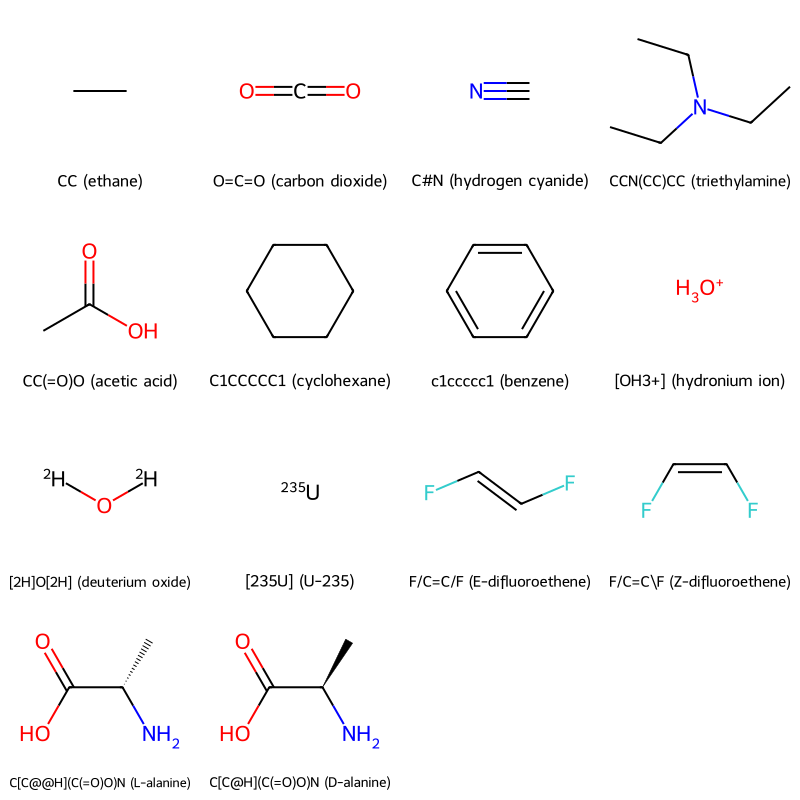

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D, MolsMatrixToGridImage

smiles_string = [
    'CC', 'O=C=O', 'C#N', 'CCN(CC)CC', 'CC(=O)O', 'C1CCCCC1', 'c1ccccc1',
    '[OH3+]', '[2H]O[2H]', '[235U]', 'F/C=C/F', 'F/C=C\\F', 'C[C@@H](C(=O)O)N', 'C[C@H](C(=O)O)N'
]
# use '\\' instead of '\' in latest python releases (3.12 or above)

legends_list = [
    'CC (ethane)', 'O=C=O (carbon dioxide)', 'C#N (hydrogen cyanide)', 'CCN(CC)CC (triethylamine)',
    'CC(=O)O (acetic acid)', 'C1CCCCC1 (cyclohexane)', 'c1ccccc1 (benzene)', '[OH3+] (hydronium ion)', 
    '[2H]O[2H] (deuterium oxide)', '[235U] (U-235)', 'F/C=C/F (E-difluoroethene)',
    'F/C=C\\F (Z-difluoroethene)', 'C[C@@H](C(=O)O)N (L-alanine)', 'C[C@H](C(=O)O)N (D-alanine)'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=4)

#### Canonicalization
One important property of SMILES is the existence of unique SMILES or absolute SMILES. A molecule can be represented by a number of different SMILES strings known as generic SMILES. For example, CCO, OCC and C(O)C all represent ethanol. A unique SMILES is universal, although dependent on the specific algorithm used to generate it. 

| Input SMILES	| Unique SMILES |
|---------------|---------------|
| OCC	| CCO |
| [CH3][CH2][OH]	| CCO |
| C-C-O	| CCO |
| C(O)C	| CCO |
| `OC(=O)C(Br)(Cl)N` | `NC(Cl)(Br)C(=O)O` |
| `ClC(Br)(N)C(=O)O` | `NC(Cl)(Br)C(=O)O` |
| `O=C(O)C(N)(Br)Cl` | `NC(Cl)(Br)C(=O)O` |

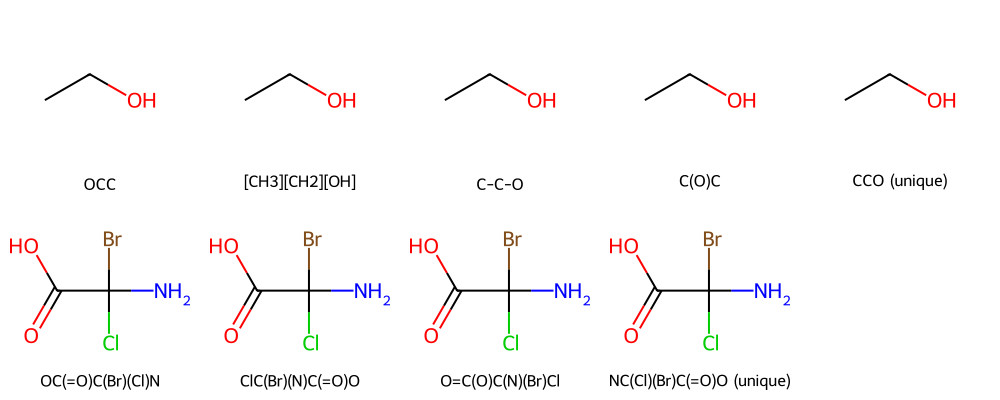

In [2]:
smiles_string = [
    'OCC', '[CH3][CH2][OH]', 'C-C-O', 'C(O)C', 'CCO',
    'OC(=O)C(Br)(Cl)N', 'ClC(Br)(N)C(=O)O', 'O=C(O)C(N)(Br)Cl', 'NC(Cl)(Br)C(=O)O'
]

legends_list = [
    'OCC', '[CH3][CH2][OH]', 'C-C-O', 'C(O)C', 'CCO (unique)',
    'OC(=O)C(Br)(Cl)N', 'ClC(Br)(N)C(=O)O', 'O=C(O)C(N)(Br)Cl', 'NC(Cl)(Br)C(=O)O (unique)'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=5)

Typically, SMILES notation of a chemical species consists of a series of characters without any space. Hydrogen atoms may be excluded (graphs with implicit Hs) or included (graphs with explicit Hs). Similarly, aromatic structures may be specified directly or in Kekulé form.
There are five generic SMILES encoding rules, corresponding to atoms, bonds, branches, rings and disconnections. In addition, there are rules to include information on isomers - chirality, geometric isomerism, etc.

#### Atoms

Atoms are represented by their atomic symbols. Each non-H atom may also be specified by its atomic symbol enclosed in square brackets, [ ]. The second letter of two-character symbols must be entered in lower case. Elements in the "organic subset" B, C, N, O, P, S, F, Cl, Br, and I may be written without brackets if the number of attached hydrogens conforms to the lowest normal valence consistent with explicit bonds. "Lowest normal valences" are B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), and 1 for the halogens. Atoms in aromatic rings are specified by lower case letters, e.g., aliphatic carbon is represented by the capital letter C, aromatic carbon by lower case c. Since attached hydrogens are implied in the absence of brackets, the following atomic symbols are valid SMILES notations.

| Symbols, implicit Hs | Molecules |  |
|--------|--------------|---------|
| C	| methane	| (CH4) |
| P	| phosphine	| (PH3) |
| N	|ammonia	| (NH3) |
| S	| hydrogen sulfide	| (H2S) |
| O	| water	| (H2O) |
| Cl	| hydrochloric acid	| (HCl) |

Atoms with valences other than "normal" and elements not in the "organic subset" must be described in brackets.

| Symbols | Meaning |
|--------|---------|
| [S]	| elemental sulfur |
| [Au]	| elemental gold |

Within brackets, any attached hydrogens and formal charges must always be specified. The number of attached hydrogens is shown by the symbol H followed by an optional digit. Similarly, a formal charge is shown by one of the symbols + or -, followed by an optional digit. If unspecified, the number of attached hydrogens and charge are assumed to be zero for an atom inside brackets. Constructions of the form [Fe+++] are synonymous with the form [Fe+3]. 

[11:14:21] WARNING: not removing hydrogen atom without neighbors


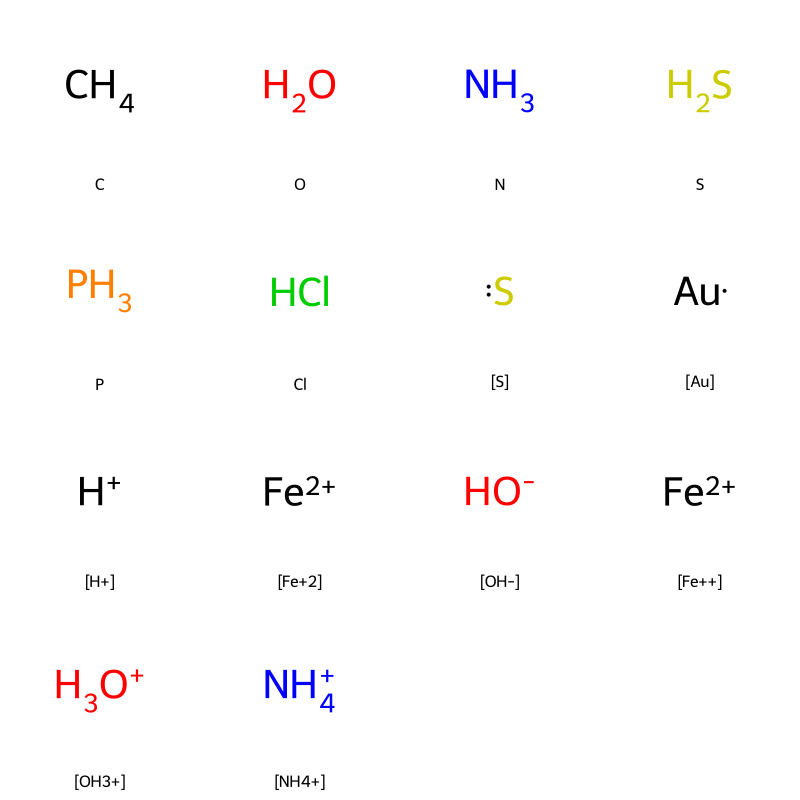

In [3]:
smiles_string = [
    'C', 'O', 'N', 'S', 'P', 'Cl',
    '[S]', '[Au]', '[H+]', '[Fe+2]', '[OH-]', '[Fe++]', '[OH3+]', '[NH4+]'
]

legends_list = [
    'C', 'O', 'N', 'S', 'P', 'Cl',
    '[S]', '[Au]', '[H+]', '[Fe+2]', '[OH-]', '[Fe++]', '[OH3+]', '[NH4+]'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=4)

#### Bonds

Single, double, triple, and aromatic bonds are represented by -, =, #, and :, respectively. By default, adjacent atoms are connected by a single or aromatic bond. 

| Symbols, implicit Hs | Meaning | |
|----------------------|---------|----------------------|
| CC	| ethane	| (CH3CH3) |
| C=O	| formaldehyde	| (CH2O) |
| C=C	| ethene	| (CH2=CH2) |
| O=C=O	| carbon dioxide	| (CO2) |
| COC	| dimethyl ether	| (CH3OCH3) |
| C#N	| hydrogen cyanide	| (HCN) |
| CCO	| ethanol	| (CH3CH2OH) |
| [H][H]	| molecular hydrogen	| (H2) |

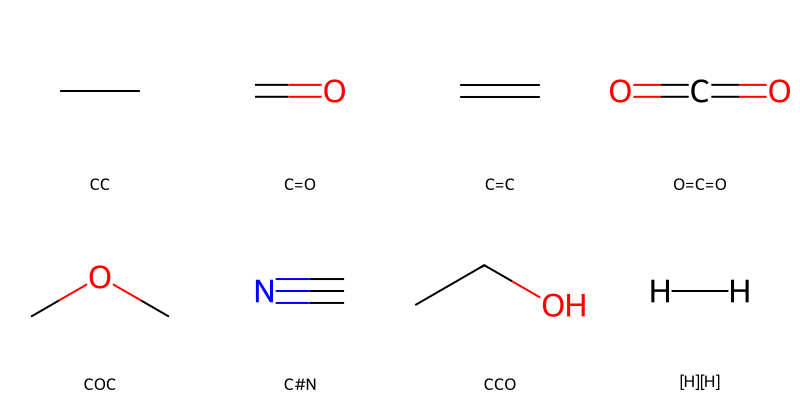

In [4]:
smiles_string = [
    'CC', 'C=O', 'C=C', 'O=C=O', 'COC', 'C#N',
    'CCO', '[H][H]'
]

legends_list = [
    'CC', 'C=O', 'C=C', 'O=C=O', 'COC', 'C#N',
    'CCO', '[H][H]'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=4)

#### Branches
Brances are specified by enclosing them in parentheses, and can be nested or stacked. The implicit connection to a parenthesized expression (a "branch") is to the left. Examples are, CCN(CC)CC (Triethylamine),	CC(C)C(=O)O (Isobutyric acid),	C=CC(CCC)C(C(C)C)CCC (3-propyl-4-isopropyl-1-heptene). 

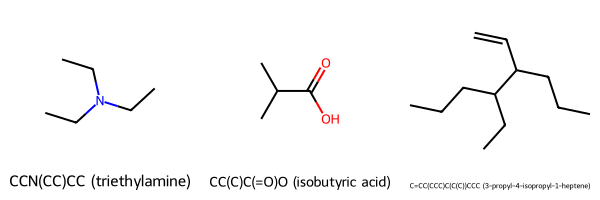

In [5]:
smiles_string = [
    'CCN(CC)CC', 'CC(C)C(=O)O', 'C=CC(CCC)C(C(C))CCC'
]

legends_list = [
    'CCN(CC)CC (triethylamine)', 'CC(C)C(=O)O (isobutyric acid)', 'C=CC(CCC)C(C(C))CCC (3-propyl-4-isopropyl-1-heptene)'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=3)

#### Cyclic Structures

Cyclic structures are represented by designating by a digit immediately following the atomic symbol at each ring closure bonds. 

SMILES notations for 1-methyl-3-bromo-cyclohexene-1 is CC1=CC(Br)CCC1. It may be also written as CC1=CC(CCCC1)Br.

A single atom may have more than one ring closure. This is illustrated by the structure of cubane in which two atoms have more than one ring closure. Generation of SMILES for cubane: C12C3C4C1C5C4C3C25.

If desired, digits denoting ring closures can be reused. As an example, the digit 1 used twice in the specification, O1CCCCC1N1CCCCC1. 

The ability to re-use ring closure digits makes it possible to specify structures with 10 or more rings. Structures that require more than 10 ring closures to be open at the same time are exceedingly rare. If necessary or desired, higher-numbered ring closures may be specified by prefacing a two-digit number with percent sign (%). For example, C2%13%24 is a carbon atom with a ring closures 2, 13, and 24. 

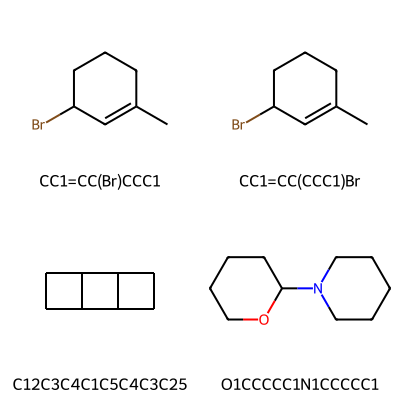

In [6]:
smiles_string = [
    'CC1=CC(Br)CCC1', 'CC1=CC(CCC1)Br', 'C12C3C4C1C5C4C3C25', 'O1CCCCC1N1CCCCC1'
]

legends_list = [
    'CC1=CC(Br)CCC1', 'CC1=CC(CCC1)Br', 'C12C3C4C1C5C4C3C25', 'O1CCCCC1N1CCCCC1'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=2)

####  Disconnected Structures

Disconnected compounds are written as individual structures separated by a "." (period). The order in which ions or ligands are listed is arbitrary. There is no implied pairing of one charge with another, nor is it necessary to have a net zero charge. If desired, the SMILES of one ion may be imbedded within another as shown in the example of sodium phenoxide.

[Na+].[O-]c1ccccc1 or c1cc([O-].[Na+])ccc1

Matching pairs of digits following atom specifications imply that the atoms are bonded to each other. The bond may be explicit (bond symbol and/or direction preceding the ring closure digit) or implicit (a nondirectional single or aromatic bond). This is true whether or not the bond ends up as part of a ring.

Adjacent atoms separated by dot (.) implies that the atoms are not bonded to each other. This is true whether or not the atoms are in the same connected component.

For example, C1.C1 specifies the same molecule as CC(ethane).

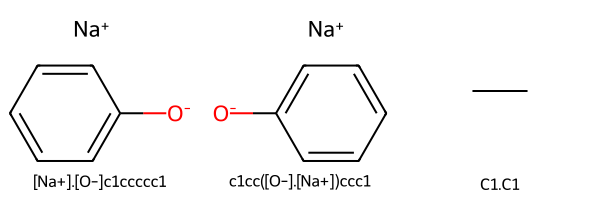

In [7]:
smiles_string = [
    '[Na+].[O-]c1ccccc1', 'c1cc([O-].[Na+])ccc1', 'C1.C1'
]

legends_list = [
    '[Na+].[O-]c1ccccc1', 'c1cc([O-].[Na+])ccc1', 'C1.C1'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=3)

#### Isomeric SMILES

This section describes the SMILES rules used to specify isotopism, configuration about double bonds, and chirality. The term isomeric SMILES collectively refers to SMILES written using these rules.

The SMILES isomer specification rules allow chirality to be completely specified for any structure, if it is known. Unlike most existing chemical nomenclatures such as CIP and IUPAC, these rules are also designed to allow rigorous partial specification of chirality. Aside from use in macros, substructure searching, and other pattern matching operations, this is important because much of the world's available chemical information is known for structures with incompletely resolved chiralities (not all possible chiral centers are separated, known, or reported).

All isomer specification rules in SMILES are therefore optional. The absence of a specification for any attribute implies that the value of that attribute is unspecified.

#### Isotopic Specification

Isotopic specifications are indicated by preceding the atomic symbol with a number equal to the desired integral atomic mass. An atomic mass can only be specified inside brackets. 

| Smiles	| Name |
|-----------|------|
| [12C]	| carbon-12 |
| [13C]	| carbon-13 |
| [C]	| carbon (unspecified mass) |
| [13CH4]	| C-13 methane| 

#### Configuration Around Double Bonds

Configuration around double bonds is specified by the characters / and \ which are "directional bonds" and can be thought of as kinds of single or aromatic (eg. default) bonds. These symbols indicate relative directionality between the connected atoms, and have meaning only when they occur on both atoms which are double bonded. For instance, the following SMILES are all valid for E- and Z-1,2-difluoroethene. 

|trans isomer|cis - isomer|
|-----------|---------|
| F/C=C/F	| F/C=C\F |
| F\C=C\F	| F\C=C/F |

An important difference between SMILES chirality conventions and others such as CIP is that SMILES uses local chirality representation (as opposed to absolute chirality), which allows partial specifications.

#### Configuration Around Tetrahedral Centers

In SMILES, tetrahedral centers may be indicated by a simplified chiral specification (@ or @@) written as an atomic property following the atomic symbol of the chiral atom. If a chiral specification is not present for a chiral atom, its chirality is implicitly not specified.

Looking from the amino N to the chiral C (as the SMILES is written), the three other neighbors appear anticlockwise in the order that they are written in the top SMILES, N[C@](C)(F)C(=O)O (methyl-C, F, carboxy-C), and clockwise in the bottom one, N[C@@](F)(C)C(=O)O. The symbol "@" indicates that the following neighbors are listed anticlockwise (it is a "visual mnemonic" in that the symbol looks like an anticlockwise spiral around a central circle). "@@" indicates that the neighbors are listed clockwise (or anti-anti-clockwise).

If the central C is not the first atom in the SMILES and has an implicit H (at most one), the implicit H is taken to be the first neighbor atom of the three neighbors that follow a tetrahedral specification. If the central C is first in the SMILES, the implicit H is taken to be the "from" atom. 

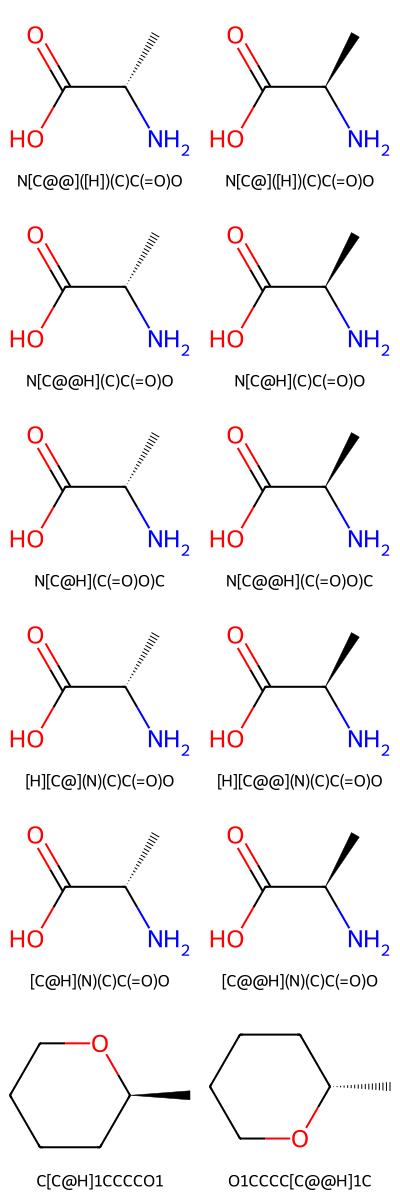

In [8]:
smiles_string = [
    'N[C@@]([H])(C)C(=O)O', 'N[C@]([H])(C)C(=O)O',
    'N[C@@H](C)C(=O)O', 'N[C@H](C)C(=O)O',
    'N[C@H](C(=O)O)C', 'N[C@@H](C(=O)O)C', 
    '[H][C@](N)(C)C(=O)O',	'[H][C@@](N)(C)C(=O)O',
    '[C@H](N)(C)C(=O)O', '[C@@H](N)(C)C(=O)O',
    'C[C@H]1CCCCO1', 'O1CCCC[C@@H]1C'
]

legends_list = [
    'N[C@@]([H])(C)C(=O)O', 'N[C@]([H])(C)C(=O)O',
    'N[C@@H](C)C(=O)O', 'N[C@H](C)C(=O)O',
    'N[C@H](C(=O)O)C', 'N[C@@H](C(=O)O)C', 
    '[H][C@](N)(C)C(=O)O',	'[H][C@@](N)(C)C(=O)O',
    '[C@H](N)(C)C(=O)O', '[C@@H](N)(C)C(=O)O',
    'C[C@H]1CCCCO1', 'O1CCCC[C@@H]1C'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=2)

The chiral order of the ring closure bond is implied by the lexical order that the ring closure digit appears on the chiral atom (not in the lexical order of the "substituent" atom).

#### General Chiral Specification

There are many kinds of chirality other than tetrahedral. The use of the "@" symbol described above is actually a special case of a general chiral specification syntax.

The general chiral specification used in SMILES has three parts: the @ symbol, followed by a two-letter chiral class indicator, followed by a numerical chiral permutation designator. A default chiral class is assigned to each degree (number of connections); the default class for four connections is tetrahedral (TH). Most chiralities have more than two possible choices; the choices are assigned from a table numerically. In most cases, the @1 designation means "anticlockwise around the axis represented by SMILES order" and @2 means "clockwise". Notations in the form "@@" and "@@@" are interpreted as "@2" and "@3" (analogous to "+++" meaning "+3"). The "@" and "@@" notations used above are shortcuts for the full specifications "@TH1" and "@TH2". In practice, full chiral specifications are not often needed.

SMILES handles the full range of chiral specification, including resolution of "reduced chirality" (where the number of enantiomers is reduced by symmetry) and "degenerate chirality" (where the center becomes non-chiral due to symmetrical substitution). As with other aspects of SMILES, the language guarantees the ability to specify exactly what is known, including partial specifications. The SMILES system will generate unique isomeric SMILES for any given specification, and substructure recognition will operate correctly on all types of chirality.

The rest of this section will be limited to discussing the following chiralities: tetrahedral, allene-like, square-planar, trigonal-bipyramidal, and octahedral. Although many more chiral classes can be handled by this system (it's table-driven), these five classes are very common in chemistry and cover most of the issues to be encountered in the remainder.

#### Tetrahedral 
The tetrahedral class symbol is TH. This is the default chiral class for degree four. Possible values are 1 and 2. @TH1 (or just @) indicates that, looking from the first connected atom, the following three connected atoms are listed anticlockwise; @TH2 (or @@) indicates clockwise.

#### Allene-like 
The allene-like class symbol is AL. This is the default chiral class for degree 2 (the chiral center is the central atom with two double bonds). Although substituted C=C=C structures are most common, C=C=C=C=C structures are also allene-like, as are any odd number of serially double-bonded atoms. Possible values are @AL1 (or just @) and @AL2 (or @@); these are interpreted by superimposing the substituted atoms and evaluating as per tetrahedral. Hydrogens attached to substituted allene-like atoms are taken to be immediately following that atom, as shown below:

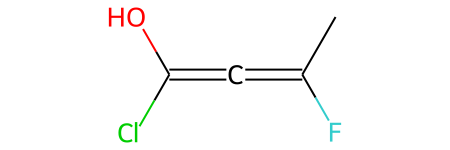

In [9]:
Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')

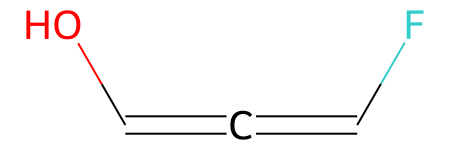

In [10]:
Chem.MolFromSmiles('OC=[C@]=CF')

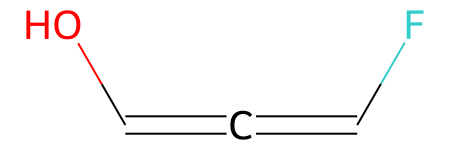

In [11]:
Chem.MolFromSmiles('OC([H])=[C@AL1]=C([H])F')

#### Square-planar. 
The square-planar class symbol is SP Possible values are @SP1, @SP2, and @SP3; this is not the default chiral class for degree four, so shorthand specifications are not allowed. Square-planar is also somewhat unusual in that the ideas of clockwise and anticlockwise do not apply.

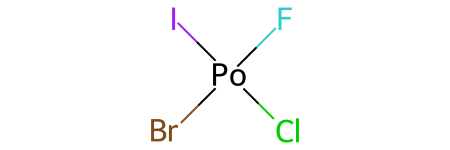

In [12]:
Chem.MolFromSmiles('F[Po@SP1](Cl)(Br)I') # SP1 lists in a "U shape"

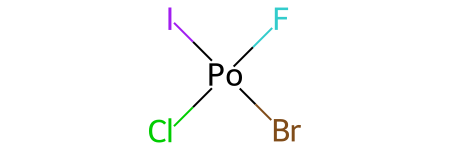

In [13]:
Chem.MolFromSmiles('F[Po@SP2](Cl)(Br)I') # SP2 lists in a "4-shape"

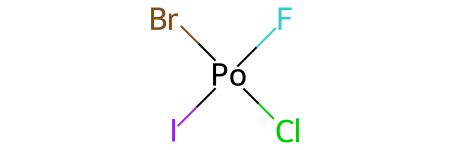

In [14]:
Chem.MolFromSmiles('F[Po@SP3](Cl)(Br)I') # SP3 lists in a "Z-shape"

#### Trigonal-bipyramidal. 
The trigonal-bipyramidal class symbol is TB. This is the default chiral class for degree five. Possible values are @TB1 to @TB20. @TB1 (or just @) indicates that, when the SMILES is listed from one axial connection to the other, the three intermediate, equatorially-connected atoms are listed anticlockwise; @TB2 (or @@) indicates clockwise. This is illustrated below.

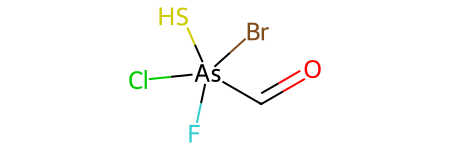

In [16]:
Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')

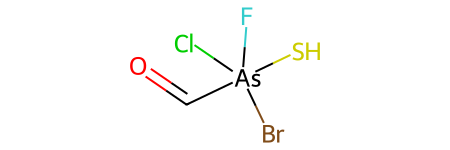

In [17]:
Chem.MolFromSmiles('S[As@TB1](F)(Cl)(Br)C=O')

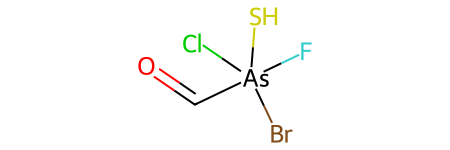

In [18]:
Chem.MolFromSmiles('S[As@TB10](F)(Cl)(Br)C=O')

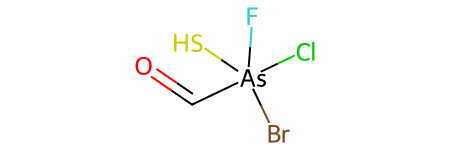

In [19]:
Chem.MolFromSmiles('S[As@TB20](F)(Cl)(Br)C=O')

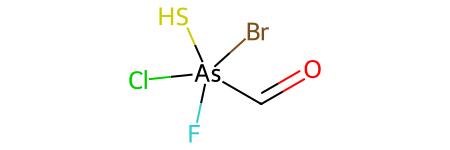

In [20]:
Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S')

#### Octahedral. 
The octahedral class symbol is OH. This is the default chiral class for degree six. Possible values are @OH1 to @OH30. @OH1 (or just @) indicates that, when the SMILES is listed from one axial connection to the other, the four intermediate, equatorially-connected atoms are listed anticlockwise; @OH2 (or @@) indicates clockwise. This is illustrated below.

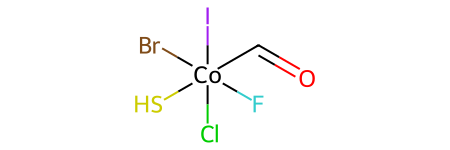

In [21]:
Chem.MolFromSmiles('O=C[Co@OH1](F)(Cl)(Br)(I)S')

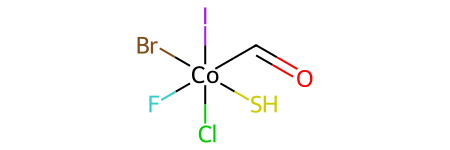

In [22]:
Chem.MolFromSmiles('O=C[Co@OH30](F)(Cl)(Br)(I)S')

#### SMILES Conventions

#### Hydrogens

Implicit: For atoms specified without brackets, from normal valence assumptions.
Explicit by count: Inside brackets, by the hydrogen count supplied; zero if unspecified.
Explicit atoms: As [H] atoms.

There are four situations of explicit hydrogen specification.

1. A proton or charged H, [H+];
2. Molecular hydrogen or H-H bonds, [H][H];
3. Bridged hydrogens. 
4. Heavy water, H-isotopes [2H]O[2H].

#### Aromaticity

In a straightforward manner, lower case atomic symbols can be used to represent aromatic structures.

The SMILES algorithm uses an extended version of Huckel's rule to identify aromatic molecules and ions. To qualify as aromatic, all atoms in the ring must be sp2 hybridized and the number of available "excess" p-electrons must satisfy Hueckel's 4N+2 criterion. As an example, benzene is written c1ccccc1, but an entry of C1=CC=CC=C1 - cyclohexatriene, the Kekulé form - leads to detection of aromaticity and results in an internal structural conversion to aromatic representation. Conversely, entries of c1ccc1 and c1ccccccc1 will produce the correct anti-aromatic structures for cyclobutadiene and cyclooctatetraene, C1=CC=C1 and C1=CC=CC=CC=C1. In such cases the SMILES system looks for a structure that preserves the implied sp2 hybridization, the implied hydrogen count, and the specified formal charge, if any. 

Some inputs, however, may not only be incorrect but also impossible, such as c1cccc1. Here c1cccc1 cannot be converted to C1=CCC=C1 since one of the carbon atoms would be sp3 with two attached hydrogens. In such a structure alternating single and double bond assignments cannot be made. The SMILES system will flag this as an "impossible" input. Please note that only atoms on the following list can be considered aromatic: C, N, O, P, S, As, Se, and * (wildcard). In addition, exocyclic double bonds do not break aromaticity.

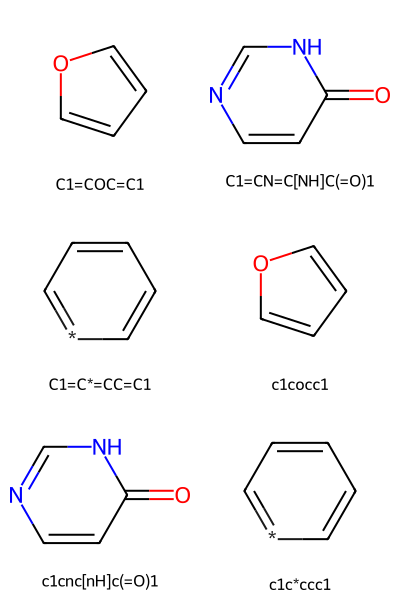

In [23]:
smiles_string = [
    'C1=COC=C1',	'C1=CN=C[NH]C(=O)1',	'C1=C*=CC=C1',
    'c1cocc1',	'c1cnc[nH]c(=O)1',	'c1c*ccc1'
]

legends_list = [
    'C1=COC=C1',	'C1=CN=C[NH]C(=O)1',	'C1=C*=CC=C1',
    'c1cocc1',	'c1cnc[nH]c(=O)1',	'c1c*ccc1'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=2)

#### Aromatic Nitrogen Compounds

All three common types of aromatic nitrogen may be specified with the aromatic nitrogen symbol n. Archetypical examples are pyridine, pyridine-N-oxide, and pyrrole.
		
n1ccccc1 (Pyridine),	O=n1ccccc1  [O-][n+]1ccccc1	Cn1cccc1 ((Pyridine-N-oxide)),   [nH]1cccc1 (Methyl and 1H-pyrrole).

Note that the pyrrolyl nitrogen in 1H-pyrrole is written [nH] to distinguish this kind of nitrogen from a pyridyl-N. Alternative valid SMILES for 1H-pyrrole include [H]n1cccc1 (with explicit hydrogen) and N1C=CC=C1 (aliphatic form) all three input forms are equivalent.

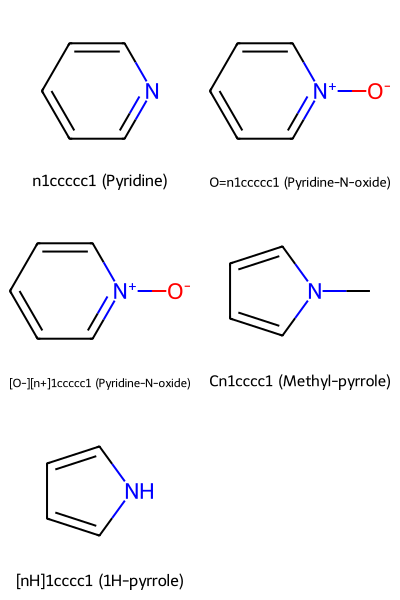

In [24]:
smiles_string = [
    'n1ccccc1',	'O=n1ccccc1',  '[O-][n+]1ccccc1',	'Cn1cccc1',   '[nH]1cccc1'
]

legends_list = [
    'n1ccccc1 (Pyridine)',	'O=n1ccccc1 (Pyridine-N-oxide)',  '[O-][n+]1ccccc1 (Pyridine-N-oxide)',	'Cn1cccc1 (Methyl-pyrrole)',   '[nH]1cccc1 (1H-pyrrole)'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, molsPerRow=2)


#### Bonding Conventions

An advantage of using SMILES is its ability to consistently describe different valence models of the same structure. For instance, nitromethane can be represented in SMILES as CN(=O)=O or as the charge separated C[N+](=O)[O-] (former is generally used because it preserves symmetry).  In general, when symmetry is not an issue, most chemists prefer charge-separated structures if they can avoid representing atoms in unusual valence states, e.g., diazomethane is written as C=[N+]=[N-] rather than C=[N]=[N].

#### Tautomers

Selection of one or all tautomeric structures is left to the user and strongly depends on the application. Given one tautomeric form, most chemical information systems will report data for all known tautomers if needed. The role of SMILES is to specify exactly which tautomeric form is requested, and for which there are data. 

#### Extensions for Reactions

Component parts of a reaction are handled by introducing the ">" character as a new separator. Any reaction must have exactly two > characters in it. ">>" is a valid reaction SMILES for an empty reaction. Each of the ">"-separated components of a reaction must be a valid molecule SMILES. Molecule SMILES never have a ">" character.

#### SMILES examples from Daylight Chemical Information Systems, Inc. 

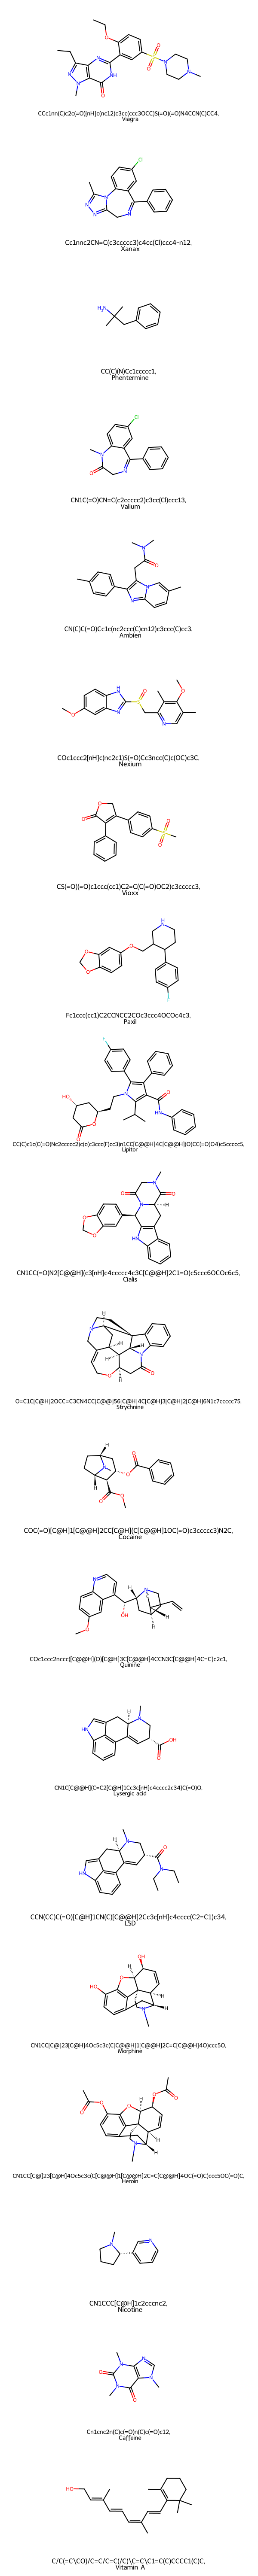

In [25]:
smiles_string = [
    'CCc1nn(C)c2c(=O)[nH]c(nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4',
    'Cc1nnc2CN=C(c3ccccc3)c4cc(Cl)ccc4-n12',
    'CC(C)(N)Cc1ccccc1',
    'CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13',
    'CN(C)C(=O)Cc1c(nc2ccc(C)cn12)c3ccc(C)cc3',
    'COc1ccc2[nH]c(nc2c1)S(=O)Cc3ncc(C)c(OC)c3C',
    'CS(=O)(=O)c1ccc(cc1)C2=C(C(=O)OC2)c3ccccc3',
    'Fc1ccc(cc1)C2CCNCC2COc3ccc4OCOc4c3',
    'CC(C)c1c(C(=O)Nc2ccccc2)c(c(c3ccc(F)cc3)n1CC[C@@H]4C[C@@H](O)CC(=O)O4)c5ccccc5',
    'CN1CC(=O)N2[C@@H](c3[nH]c4ccccc4c3C[C@@H]2C1=O)c5ccc6OCOc6c5',
    'O=C1C[C@H]2OCC=C3CN4CC[C@@]56[C@H]4C[C@H]3[C@H]2[C@H]6N1c7ccccc75',
    'COC(=O)[C@H]1[C@@H]2CC[C@H](C[C@@H]1OC(=O)c3ccccc3)N2C',
    'COc1ccc2nccc([C@@H](O)[C@H]3C[C@@H]4CCN3C[C@@H]4C=C)c2c1',
    'CN1C[C@@H](C=C2[C@H]1Cc3c[nH]c4cccc2c34)C(=O)O',
    'CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(C2=C1)c34',
    'CN1CC[C@]23[C@H]4Oc5c3c(C[C@@H]1[C@@H]2C=C[C@@H]4O)ccc5O',
    'CN1CC[C@]23[C@H]4Oc5c3c(C[C@@H]1[C@@H]2C=C[C@@H]4OC(=O)C)ccc5OC(=O)C',
    'CN1CCC[C@H]1c2cccnc2',
    'Cn1cnc2n(C)c(=O)n(C)c(=O)c12',
    'C/C(=C\\CO)/C=C/C=C(/C)\\C=C\\C1=C(C)CCCC1(C)C'
]

legends_list = [
    'CCc1nn(C)c2c(=O)[nH]c(nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4, \n Viagra',
    'Cc1nnc2CN=C(c3ccccc3)c4cc(Cl)ccc4-n12, \n Xanax',
    'CC(C)(N)Cc1ccccc1, \n Phentermine',
    'CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13, \n Valium',
    'CN(C)C(=O)Cc1c(nc2ccc(C)cn12)c3ccc(C)cc3, \n Ambien',
    'COc1ccc2[nH]c(nc2c1)S(=O)Cc3ncc(C)c(OC)c3C, \n Nexium',
    'CS(=O)(=O)c1ccc(cc1)C2=C(C(=O)OC2)c3ccccc3, \n Vioxx',
    'Fc1ccc(cc1)C2CCNCC2COc3ccc4OCOc4c3, \n Paxil',
    'CC(C)c1c(C(=O)Nc2ccccc2)c(c(c3ccc(F)cc3)n1CC[C@@H]4C[C@@H](O)CC(=O)O4)c5ccccc5, \n Lipitor',
    'CN1CC(=O)N2[C@@H](c3[nH]c4ccccc4c3C[C@@H]2C1=O)c5ccc6OCOc6c5, \n Cialis',
    'O=C1C[C@H]2OCC=C3CN4CC[C@@]56[C@H]4C[C@H]3[C@H]2[C@H]6N1c7ccccc75, \n Strychnine',
    'COC(=O)[C@H]1[C@@H]2CC[C@H](C[C@@H]1OC(=O)c3ccccc3)N2C, \n Cocaine',
    'COc1ccc2nccc([C@@H](O)[C@H]3C[C@@H]4CCN3C[C@@H]4C=C)c2c1, \n Quinine',
    'CN1C[C@@H](C=C2[C@H]1Cc3c[nH]c4cccc2c34)C(=O)O, \n Lysergic acid',
    'CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(C2=C1)c34, \n LSD',
    'CN1CC[C@]23[C@H]4Oc5c3c(C[C@@H]1[C@@H]2C=C[C@@H]4O)ccc5O, \n Morphine',
    'CN1CC[C@]23[C@H]4Oc5c3c(C[C@@H]1[C@@H]2C=C[C@@H]4OC(=O)C)ccc5OC(=O)C, \n Heroin',
    'CN1CCC[C@H]1c2cccnc2, \n Nicotine',
    'Cn1cnc2n(C)c(=O)n(C)c(=O)c12, \n Caffeine',
    'C/C(=C\\CO)/C=C/C=C(/C)\\C=C\\C1=C(C)CCCC1(C)C, \n Vitamin A'
]

mols_2d = [Chem.MolFromSmiles(smile) for smile in smiles_string]
mols_legends = [legend for legend in legends_list]

MolsToGridImage(mols=mols_2d, legends=mols_legends, subImgSize=(600,300), molsPerRow=1)